# Estimativas de Localização

Variáveis com dados de medição ou contagem podem ter milhares de valores diferentes. 
Um passo fundamental na exploração dos dados é definir um "valor típico" para cada variável:
uma estimativa de onde a maioria dos dados está localizada (tendência central)

Média: Sensível a valores extremos (outliers). Alternativa - média aparada.  
Mediana: Estimativa robusta de localização, pois não é influenciada por outliers que podem enviezar os resultados.

### Calcular a média, média aparada e a mediana para a população

In [35]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt # geração de gráficos
import seaborn as sns # geração de gráficos
from plotnine import * # ggplot para python
%matplotlib inline

from scipy import stats # para calcular a média aparada com a função 'trim_mean'
from statsmodels import robust # para calcular o desvio absoluto da mediana

In [2]:
state = pd.read_csv('state.csv')

In [3]:
state.shape

(50, 4)

In [4]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [5]:
# Rename para retirar o ponto '.' da coluna
state = state.rename(columns={'Murder.Rate': 'MurderRate'}) 

In [6]:
# média
state['Population'].mean()

6162876.3

In [7]:
# média aparada
stats.trim_mean(state['Population'], 0.1)   # A função trim_mean exclui % de cada ponta 
                                            # - os cinco maiores e menores estados

4783697.125

In [8]:
# mediana
state['Population'].median()

4436369.5

A média é maior que a média aparada, que é maior que a mediana. 

### Calcular a taxa média de homicídios para o país. Necessário calcular a média ou mediana ponderada

In [9]:
# média ponderada
np.average(state["MurderRate"], weights=state["Population"])

4.445833981123393

In [10]:
# mediana ponderada
state.sort_values('MurderRate', inplace=True)
cumsum = state.Population.cumsum()
cutoff = state.Population.sum() / 2.0
median_weight = state.MurderRate[cumsum >= cutoff].iloc[0]
median_weight

4.4

Ideias-chave:  
A métrica básica para localização é a média, mas esta pode ser sensível a outliers.  
Outras métricas (mediana, média aparada) são mais robustas.   

# Estimativas de Variabilidade

A localização é apenas uma dimensão na sumarização de uma característica.   
Uma segunda dimensão, variabilidade, também chamada de dispersão, mede se os valores de dados estão compactados ou espalhadas.  

Desvios: Diferença entre os valores observados e a estimativa de localização.  
Variância: Soma dos quadrados dos desvios da média, divididos por n-1.  
Desvio-padrão: raiz quadrada da variância.  
Percentil/Quantil: Valor tal P por cento dos valores assumam esse valor ou menos, e (100-P) por cento assumam esse valor ou mais.  
Amplitude interquatílica (IQR): Diferença entre o 75º percentil e o 25º percentil.  

A variância e o desvio padrão são especialmente sensíveis aos outliers, pois são baseados em desvios quadráticos.  
Uma estimativa de variabilidade ronbusta é o desvio absoluto mediano da mediana (MAD). Assim como a mediana, o MAD não é influenciado por valores extremos.

### Calcular as estimativas de variabilidade para os dados de população (desvio-padrão, IQR e MAD)

In [11]:
# desvio-padrão
state['Population'].std()

6848235.347401144

In [12]:
# amplitude interquatílica (IQR)
q1 = state['Population'].quantile(0.25)
q3 = state['Population'].quantile(0.75)
iqr = q3-q1
iqr

4847308.0

In [13]:
# desvio absoluto da mediana
robust.mad(state['Population'])

3849876.1459979336

Ideias-chave:    
A variância e o desvio-padrão são as estatísticas de variabiliade mais usadas. Ambas são sensíveis a outliers.  
Outras métricas (desvio absoluto médio e de mediano da mediana (MAD), e percentis) são mais robustas.  

# Explorando a Distribuição de Dados

Cada uma das estimativas vistas resume os dados em um único número para descrever a localização e a variabilidade dos dados.  

Boxplot: Gráfico para visualizar de forma rápida a distribuição dos dados.  
Tabela de frequências: Contagem de valores numéricos de dados que caem em um conjunto de intervalos.  
Histograma: Gráfico da tabela de frequências com as colunas no eixo x e a contagem no eixo y.  
Gráfico de densidade: Simplificação do histograma. Frequentemente usado em estimativas de densidade Kernel.  

### Calcular os percentis da taxa de homicídios e visualizar por boxplot a distribuição dos dados da população

In [14]:
# percentis da taxa de homicídios
q_5 = round(state['MurderRate'].quantile(0.05),2)
q_25 = round(state['MurderRate'].quantile(0.25),2)
q_50 = round(state['MurderRate'].quantile(0.50),2)
q_75 = round(state['MurderRate'].quantile(0.75),2)
q_95 = round(state['MurderRate'].quantile(0.95),2)
print(f'5% {q_5} - 25% {q_25} - 50% {q_50} - 75% {q_75} - 95% {q_95}')

5% 1.6 - 25% 2.42 - 50% 4.0 - 75% 5.55 - 95% 6.51


A mediana é de 4 homicídios por 100 mil pessoas, porém há uma variabilidade: 5º percentil é de apenas 1.6, e o 95º percentil é 6.51.

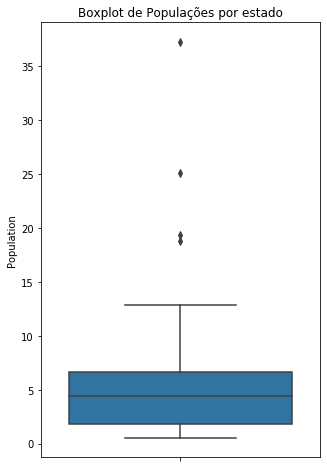

In [15]:
# boxplot da distribuição dos dados da população
plt.figure(figsize=(5,8))
sns.boxplot(y=state['Population']/1000000)
plt.title("Boxplot de Populações por estado")
plt.show()

As partes inferior e superior da caixa são 75º e 25º percentis. A mediana é mostrada na linha horizontal.  
As linhas que se estedem do topo a base indicam a variação da massa de dados e são chamadas de wiskers (1.5 ou 3.0 * IQR).  
Os pontos únicos fora das wiskers são os outliers.

In [16]:
# ver os 4 pontos outliers
state.sort_values(by='Population', ascending=False).head()

,State,Population,MurderRate,Abbreviation
4,California,37253956,4.4,CA
42,Texas,25145561,4.4,TX
31,New York,19378102,3.1,NY
8,Florida,18801310,5.8,FL
12,Illinois,12830632,5.3,IL


### Exibir as frequências da população por estado em Histogramas

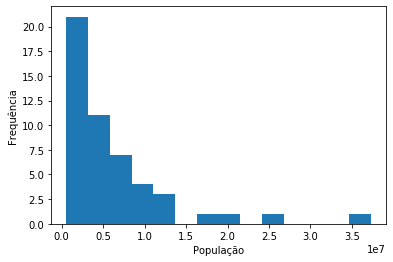

In [17]:
# histograma de população estatuaus
plt.hist(state['Population'], bins='auto')
plt.xlabel('População')
plt.ylabel('Frequência')
plt.show()

Colunas no eixo x e a contagem dos dados no eixo y

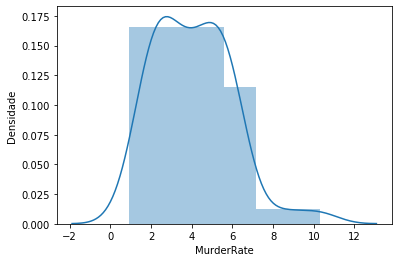

In [18]:
sns.distplot(state['MurderRate'])
plt.ylabel('Densidade')
plt.show()

Esse gráfico é uma versão “suavizada” do histograma. O eixo y mostra uma estimativa da frequência relativa de cada valor.   Em termos probabilísticos, trata-se de uma estimativa da função densidade de probabilidade da feature.

Ideias-chave:    
O histograma de frequências registra contagens de frequências no eixo y e valores das variáveis no eixo x.  
O boxplot dá uma ideia rápida da distribuição dos dados. Costuma ser usado em exibições lado a lado.

# Correlação

Estudo da correlação entre preditores, e entre preditores e uma variável alvo.  
As variáveis X e Y são tidas como positivamente correlacionadas se os valores altos de X acompanharem os valores altos de Y, e os valores baixos de X acompanharem os valores baixos de Y.  
Se os valores altos de X acompanharem os valores baixos de Y, e vice-versa, as variáveis são negativamente correlacionadas.

Coeficiente de correlação: Métrica que mede o nível em que as variáveis numéricas estão associadas umas às outras (varia de -1 a +1).  
Matriz de correlação: Tabela na qual as variáveis são mostradas tanto nas linhas quanto nas colunas, e os valores das células são a correlação entre as variáveis.  
Diagrama de dispersão: Gráfico na qual o eixo x é o valor de uma variável e o eixo y é o valor de outra. Cada ponto no gráfico é um registro. Modo padrão de visualizar o relacionamento entre duas variáveis. 

### Exibir a matriz de correlação dos retornos diários dos maiores fundos de índice

In [19]:
# importando os novos datasets para esta análise
sp500_px = pd.read_csv('sp500_data.csv')
sp500_sym = pd.read_csv('sp500_sectors.csv')

In [20]:
sp500_px.head()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [21]:
sp500_sym.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [22]:
sp500_px = sp500_px.rename(columns={'Unnamed: 0': 'DATA'})

In [23]:
etfs = sp500_px.loc[sp500_px['DATA'] > "2012-07-01", 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]

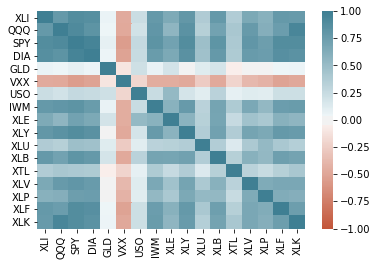

In [24]:
sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True))
plt.show()

In [25]:
# outra forma de plotar usando o pandas
etfs_2 = etfs.corr()
etfs_2.style.background_gradient(cmap='coolwarm').set_precision(2)

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
XLI,1.00,0.79,0.89,0.87,0.06,-0.47,0.24,0.78,0.65,0.80,0.38,0.78,0.37,0.66,0.60,0.79,0.78
QQQ,0.79,1.00,0.91,0.83,0.04,-0.47,0.20,0.81,0.56,0.84,0.35,0.71,0.42,0.78,0.61,0.75,0.95
SPY,0.89,0.91,1.00,0.95,0.08,-0.55,0.27,0.83,0.71,0.89,0.48,0.83,0.41,0.81,0.74,0.88,0.89
DIA,0.87,0.83,0.95,1.00,0.05,-0.51,0.26,0.76,0.66,0.85,0.46,0.79,0.38,0.77,0.75,0.86,0.84
GLD,0.06,0.04,0.08,0.05,1.00,-0.11,0.22,0.07,0.19,0.02,0.12,0.18,-0.04,-0.01,0.03,0.04,0.05
VXX,-0.47,-0.47,-0.55,-0.51,-0.11,1.00,-0.20,-0.45,-0.45,-0.47,-0.26,-0.47,-0.21,-0.38,-0.42,-0.51,-0.48
USO,0.24,0.20,0.27,0.26,0.22,-0.20,1.00,0.25,0.53,0.18,0.11,0.32,0.08,0.12,0.12,0.22,0.23
IWM,0.78,0.81,0.83,0.76,0.07,-0.45,0.25,1.00,0.59,0.78,0.33,0.70,0.39,0.66,0.54,0.76,0.76
XLE,0.65,0.56,0.71,0.66,0.19,-0.45,0.53,0.59,1.00,0.58,0.34,0.69,0.26,0.45,0.41,0.60,0.56
XLY,0.80,0.84,0.89,0.85,0.02,-0.47,0.18,0.78,0.58,1.00,0.37,0.72,0.37,0.70,0.66,0.78,0.77


Os etfs SPY e DIA tem alta correlação. Da mesma forma QQQ e XLK.

### Plotar o gráfico de dispersão para visualizar o relacionamento de duas variáveis

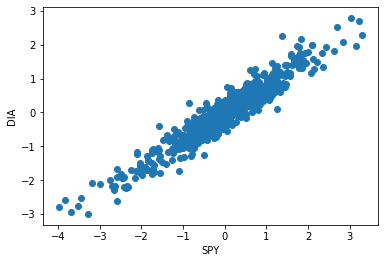

In [26]:
# correlação perfeitamente positiva
plt.xlabel('SPY')
plt.ylabel('DIA')
plt.scatter(etfs['SPY'], etfs['DIA'])
plt.show()

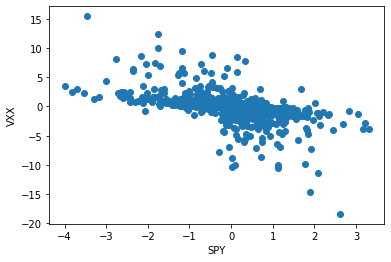

In [27]:
# correlação negativa
plt.xlabel('SPY')
plt.ylabel('VXX')
plt.scatter(etfs['SPY'], etfs['VXX'])
plt.show()

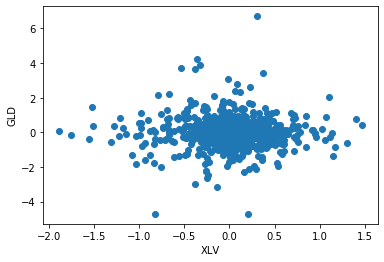

In [28]:
# ausência de correlação
plt.xlabel('XLV')
plt.ylabel('GLD')
plt.scatter(etfs['XLV'], etfs['GLD'])
plt.show()

Ideias-chave:    
O coeficiente de correlação sempre fica entre +1 (correlação perfeitamente positiva) e -1 (correlação perfeitamente negatica). O 0 ou próximo a isso indicada ausência de correlação.  
As variáveis podem ter uma associação não linear, e nesse caso, o coeficiente de correlação pode não ser uma métrica útil.

# Explorando Duas ou Mais Variáveis

Estimadores como a média e variância, examinam uma variável por vez (análise univariada).  
A análise de correlação é um método importante que compara duas variáveis (análise bivariada).  
Veremos agora estimativas e gráficos com mais de duas variáveis (análise multivariada).  



Compartimentação hexagonal: Gráfico de duas variáveis numéricas com os registros compartimentados em hexágonos.  
Tabelas de contingência: Registro de contagens entre duas ou mais variáveis categórias.  

### Compartimentação hexagonal para valores de impostos versus metro quadrado acabado

In [29]:
kc_tax = pd.read_csv('kc_tax.csv')
kc_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [30]:
# Retirando residencias muito caras e muito pequenas ou grandes
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) & 
                     (kc_tax.SqFtTotLiving < 3500), :]
kc_tax0.shape

(432693, 3)

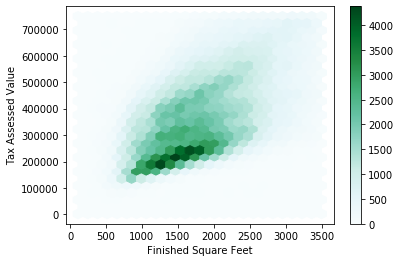

<Figure size 1584x720 with 0 Axes>

In [31]:
kc_tax0.plot(kind='hexbin', x='SqFtTotLiving', y='TaxAssessedValue', sharex=False, gridsize=25)
plt.xlabel('Finished Square Feet')
plt.ylabel('Tax Assessed Value')
plt.figure(figsize=(22,10))
plt.show()

Gráficos de dispesão são bons quando há um número relativamente pequeno de dados. Para conjunto de dados com centenas de milhares, ou milhões de registros, este gráfico seria muito denso. No gráfico hexagonal, os registros são agrupados em compartimentos hexagonais com uma cor indicando o número de registros naquele compartimento. 

Os gráficos podem ser extensíveis para mais variáveis. O valor do imposto é maior para alguns códigos postais.

In [32]:
kc_tax_zip1 = kc_tax0.loc[(kc_tax0.ZipCode == 98188), :]
kc_tax_zip2 = kc_tax0.loc[(kc_tax0.ZipCode == 98105), :]
kc_tax_zip3 = kc_tax0.loc[(kc_tax0.ZipCode == 98108), :]
kc_tax_zip4 = kc_tax0.loc[(kc_tax0.ZipCode == 98126), :]

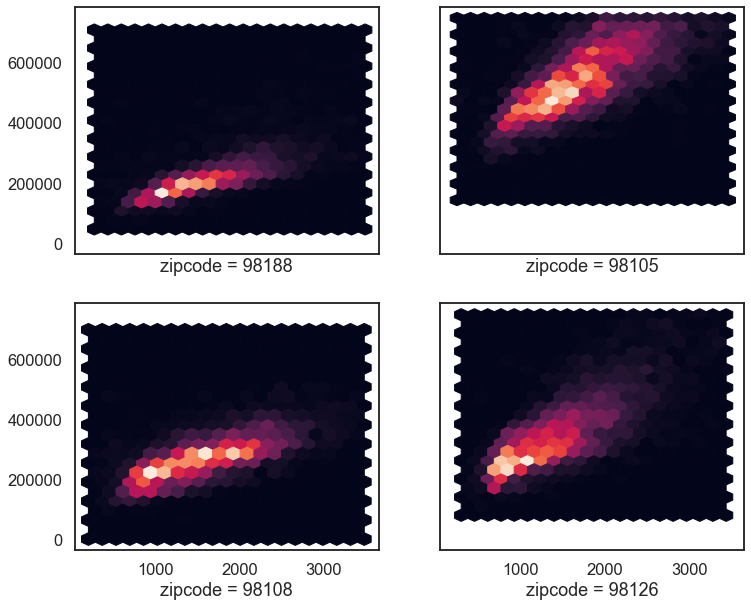

In [56]:
sns.set_style('white')
sns.set_palette('dark')
sns.set_context('talk')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 10))
ax1.hexbin(kc_tax_zip1.SqFtTotLiving, kc_tax_zip1.TaxAssessedValue, gridsize=20)
ax1.set_xlabel('zipcode = 98188')

ax2.hexbin(kc_tax_zip2.SqFtTotLiving, kc_tax_zip2.TaxAssessedValue, gridsize=20)
ax2.set_xlabel('zipcode = 98105')

ax3.hexbin(kc_tax_zip3.SqFtTotLiving, kc_tax_zip3.TaxAssessedValue, gridsize=20)
ax3.set_xlabel('zipcode = 98108')

ax4.hexbin(kc_tax_zip4.SqFtTotLiving, kc_tax_zip4.TaxAssessedValue, gridsize=20)
ax4.set_xlabel('zipcode = 98126')

plt.show()

A imagem deixa claro que o valor de imposto é maior no código postal 98105 do que em 98108, por ex.

### Tabelas de Contingências para duas variáveis categóricas

Maneira simples de resumir duas variáveis categórias é a tabela de contingências.

In [81]:
lc_loans = pd.read_csv('lc_loans.csv')
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [82]:
x_tab = pd.crosstab(lc_loans.grade, lc_loans.status)
x_tab['Total'] = pd.crosstab(lc_loans.grade, lc_loans.status).apply(lambda r: r.sum(), axis=1)
x_tab

status,Charged Off,Current,Fully Paid,Late,Total
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241


### Boxplots para dados categóricos e numéricos

Maneira simples de comparar visualmente as distribuições de uma variável numérica agrupada conforme uma variável categórica.  
Por exemplo, comparar como a porcentagem de atrasos de vos varia entre as companhias aéreas.

In [88]:
airline_stats= pd.read_csv('airline_stats.csv')
airline_stats.sample(5)

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
18997,5.741935,10.387097,0.000000,Alaska
5024,6.693548,0.779570,0.139785,United
25649,8.004202,6.968487,0.880252,United
15307,8.857143,1.785714,0.000000,Delta
24564,8.487179,2.112821,0.369231,Delta


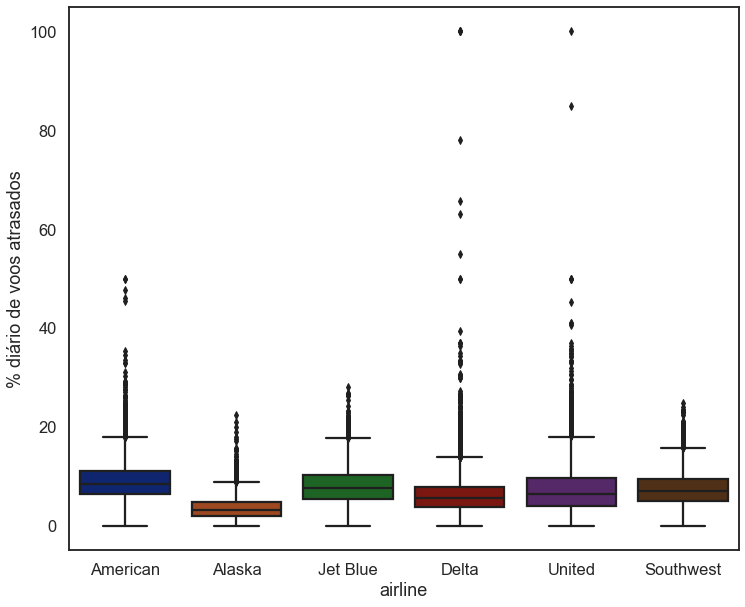

In [103]:
plt.figure(figsize=(12,10))
sns.boxplot(x = airline_stats.airline, y = airline_stats.pct_carrier_delay)
plt.ylabel("% diário de voos atrasados")
plt.show()

A Alaska se destaca por ter menos atrasos, enquando a American tem a maioria deles.  
O quartial inferior da American é maior que o quartil superior da Alaska. 

Ideias-chave:    
Compartimento hexagonal é uma ferramenta útil que permite o estudo gráfico de duas variáveis numéricas por vez, sem ficar sobrecarregado por quantidades enormes de dados.  
A tabela de contingência é a ferramenta mais comum para observação de contagens de duas variáveis categóricas.  
Boxplots permitem o registro de uma variável numérica contra uma variável categórica.